In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [ ]:
# === Load Data BTC ===
datas = joblib.load("/home/admin1/CODE/BACKTEST/data/1d.joblib")
data = datas['BTCUSDT'].copy()
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [ ]:
# --- Load and prepare DVOL ---
dvol = pd.read_csv("/home/admin1/CODE/BACKTEST/dvol.csv", parse_dates=['datetime'])
dvol = dvol.set_index('datetime')
dvol = dvol[['close']].rename(columns={'close': 'Close'})

In [ ]:
# --- Ensure index compatibility ---
data.index = pd.to_datetime(data.index).tz_localize(None).normalize()
dvol.index = pd.to_datetime(dvol.index).tz_localize(None).normalize()

In [ ]:
# --- Reindex DVOL to match data ---
dvol = dvol.reindex(data.index)

In [ ]:
# --- Calculate RVOL ---
rets = np.log(data['Close']).diff()
rvol = rets.ewm(span=5).std() * np.sqrt(365)

In [ ]:
# --- Combine into df_vol ---
df_vol = pd.DataFrame(index=data.index)
df_vol['RVOL'] = rvol
df_vol['DVOL'] = dvol['Close'] / 100

df_vol.dropna(inplace=True)

<Axes: xlabel='Date'>

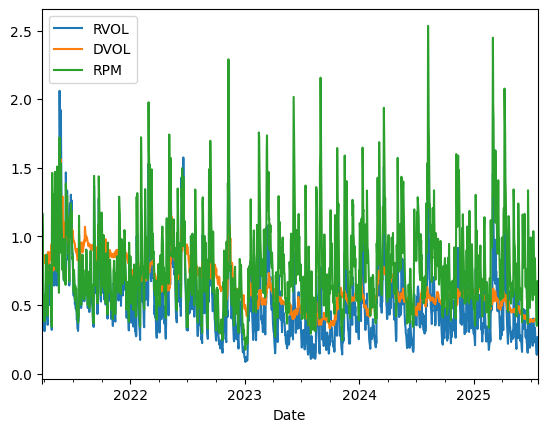

In [ ]:
df_vol['RPM'] = df_vol['RVOL'] / df_vol['DVOL'] 
df_vol.plot()

In [ ]:
sizing = df_vol['RPM']

In [ ]:
rets = rets.reindex(df_vol.index)
pnl = rets * sizing * 0.75

<Axes: xlabel='Date'>

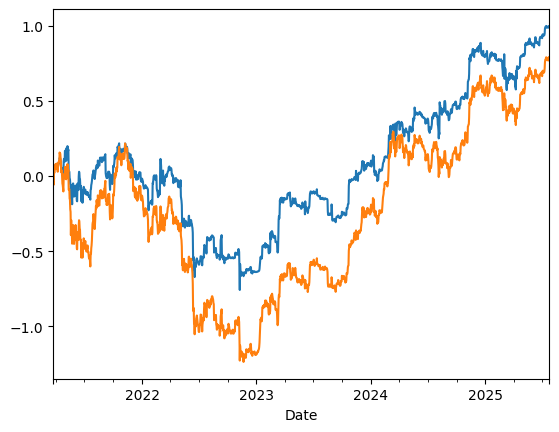

In [ ]:
pnl.cumsum().plot()
rets.cumsum().plot()